<a href="https://colab.research.google.com/github/EstherWhang/jpm_changepoint/blob/main/testing_algs/ruptures_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ruptures Changepoint Detection Algorithms

This notebook serves as a means for us to experiment and test the different ruptures algorithms

In [ ]:
#todo: make a bunch of synthetic time series datasets and test rupture algorithms on them

In [ ]:
#Esther Whang - just do things until it breaks
#Binary Segmentation (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/binseg.md)
#Bottom-up segmentation (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/bottomup.md)
#Dynamic Programming (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/dynp.md)

#Hoda Moustafa
#Kernel change point detection (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/kernelcpd.md)
#Linearly penalized segmentation (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/pelt.md)
#Window-based change point detection (https://github.com/deepcharles/ruptures/blob/master/docs/user-guide/detection/window.md)

In [ ]:
#one thing to do- check compatability, that the format of the data works with the rupture stuff as well, or use the data generator
#libraries provided by ruptures library

# Set-up

Setting up the data. Install the ruptures library if not already installed and import the libraries needed.

In [3]:
!pip install ruptures

     |████████████████████████████████| 918 kB 29.4 MB/s 


In [45]:
import matplotlib.pyplot as plt  # for display purposes
import numpy as np
import ruptures as rpt  # our package

# Generate sample data 

Data is generated through the ruptures library, some common variables: 

- n/n_samples: the max range of data points
- n_dims: the number of sets of data to be generated
- sigma: how big the change point is. The smaller the value, the bigger the jump is.
- n_bkps: the number of breaks in the data to indicate the changepoint. 
    - 1: range is a random point - n_samples
    - 2: range is (point1, point2) --> indicates the changepoint period
    - n: range is (p1,p2) , (p3,p4), ... (p(n-1) , pn)




## Types of data 

All data types return:
- signal: the number of samples used
- bkps: the specified points

### **Piecewise constant** (pw_constant):
- Uses a sigma value to generate noise 


### **Piecewise linear** (pw_linear):
- Creates a linear combination of covariants (guassain random variables)

### **Piecewise 2D Gaussian** (pw_normal):
- Creates 2d signal of Guassian signal

### **Piecewise sinusoidal** (pw_wavy):
- Creates simulates a sum-of-sine signal

[204, 413, 608, 796, 1000]


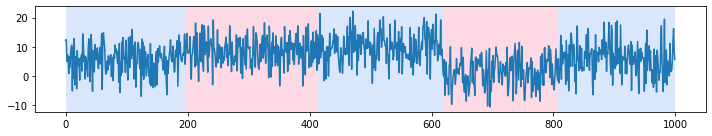

In [107]:
# piecewise constant data 
n_samples, n_dims, sigma = 1000, 1, 5
n_bkps = 4  # number of breakpoints
signal_c, bkps_c = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)

print(bkps) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_c, bkps_c)


[196, 400, 601, 799, 1000]


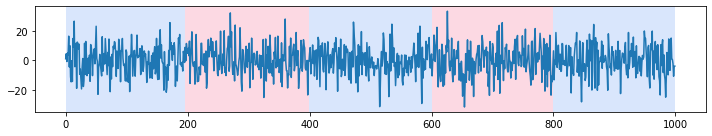

In [108]:
#piecewise linear data
n, dim, sigma = 1000, 0, 10  # number of samples, dimension of the covariates, noise standart deviation
n_bkps = 4  # number of change points
signal_l, bkps_l = rpt.pw_linear(n, dim, n_bkps, noise_std=sigma)

print(bkps_l) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_l, bkps_l)

[90, 196, 296, 396, 500]


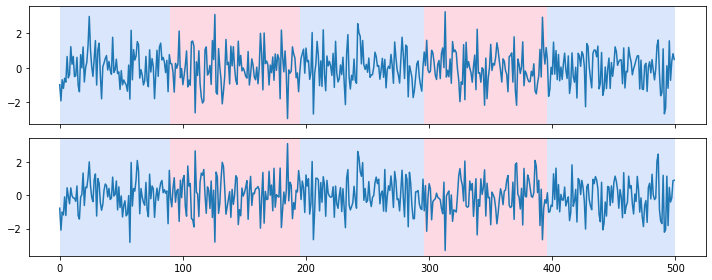

In [109]:
#normal data (Piecewise 2D Gaussian )
n = 500  # number of samples
n_bkps = 4  # number of change points, noise standart deviation
signal_n, bkps_n = rpt.pw_normal(n, n_bkps)

print(bkps_n) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_n, bkps_n)

[98, 202, 307, 407, 500]


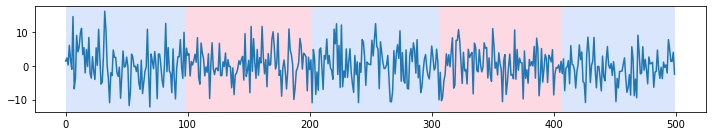

In [110]:
#wavy data (Piecewise sinusoidal signal)
n = 500 # number of samples, dimension
n_bkps, sigma = 4, 5  # number of change points, noise standart deviation
signal_w, bkps_w = rpt.pw_wavy(n, n_bkps, noise_std=sigma)

print(bkps_w) # prints the breakpoint values, the start and end of the changepoint range
fig, ax_array = rpt.display(signal_w, bkps_w)

# Algorithms Comparison

## Binary Segmentation

## Bottom-up segmentation

## Dynamic Programming


## Kernel change point detection

Has 3 model types: l2 (linear), rbf (guassian), cosine


#### pw_constant data:
- rbf and linear most accurate
- cosine not accurate, data points were too close to each other and couldn't correctly predict the changepoint values.

Piecewise constant data: --------------------------------------
Result for KCP linear:  [185, 460, 620, 810, 1000]


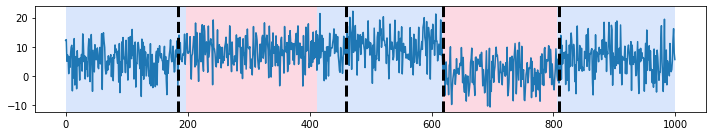

Piecewise linear data: --------------------------------------
Result for KCP linear:  [495, 570, 645, 655, 1000]


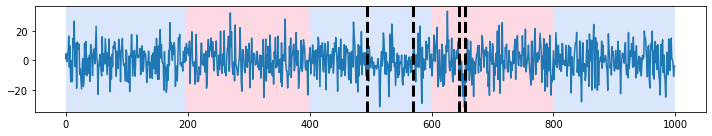

Piecewise 2D Gaussian data: --------------------------------------
Result for KCP linear:  [5, 370, 390, 395, 500]


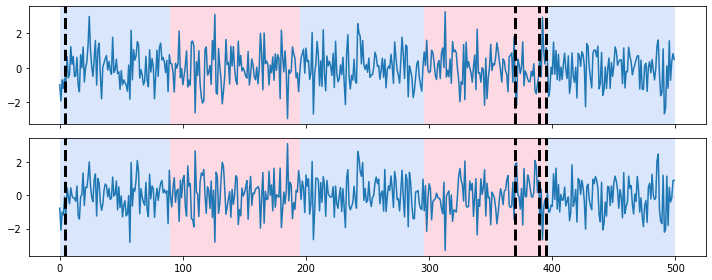

Piecewise sinusoidal data: --------------------------------------
Result for KCP linear:  [35, 70, 320, 325, 500]


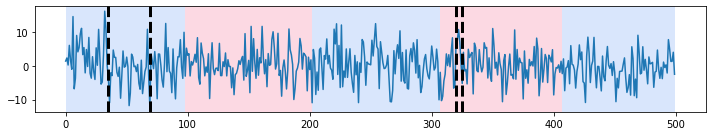

In [111]:
#linear 
#constant data
algo_linear = rpt.Dynp(model="l2").fit(signal_c)
result_c = algo_linear.predict(n_bkps=4)

print("Piecewise constant data: --------------------------------------")
print("Result for KCP linear: ", result_c)

rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_linear = rpt.Dynp(model="l2").fit(signal_l)
result_l = algo_linear.predict(n_bkps=4)

print("Piecewise linear data: --------------------------------------")
print("Result for KCP linear: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data 
algo_linear = rpt.Dynp(model="l2").fit(signal_n)
result_n = algo_linear.predict(n_bkps=4)

print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for KCP linear: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_linear = rpt.Dynp(model="l2").fit(signal_w)
result_w = algo_linear.predict(n_bkps=4)

print("Piecewise sinusoidal data: --------------------------------------")
print("Result for KCP linear: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for KCP guassian:  [180, 461, 618, 812, 1000]


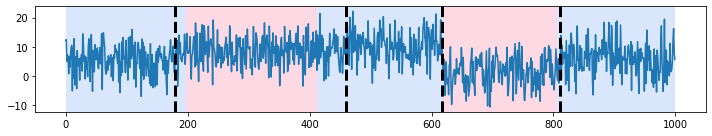

Piecewise linear data: --------------------------------------
Result for KCP guassian:  [858, 875, 949, 994, 1000]


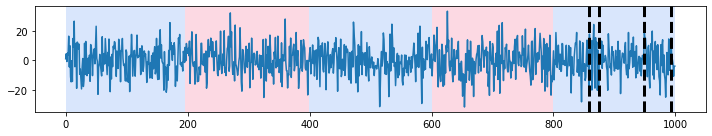

Piecewise 2D Gaussian data: --------------------------------------
Result for KCP guassian:  [242, 247, 491, 493, 500]


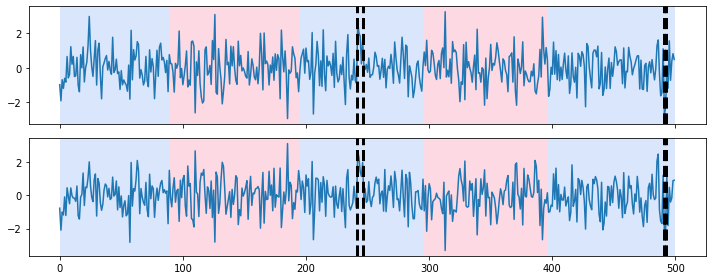

Piecewise sinusoidal data: --------------------------------------
Result for KCP guassian:  [32, 34, 320, 324, 500]


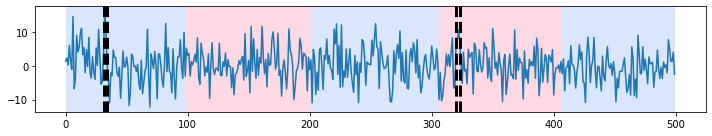

In [112]:
#guassian 
#constant data
params = {"gamma": 1e-2}
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_c)
result_c = algo_guassian.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for KCP guassian: ", result_c )

rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_l)
result_l = algo_guassian.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for KCP guassian: ", result_l )

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_n)
result_n = algo_guassian.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for KCP guassian: ", result_n )

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_guassian = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(signal_w)
result_w = algo_guassian.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for KCP guassian: ", result_w )

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for KCP cosine:  [170, 620, 635, 810, 1000]


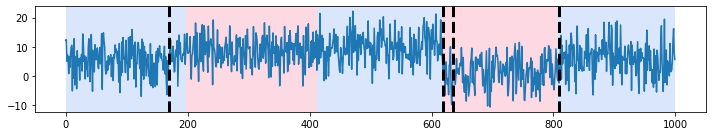

Piecewise linear data: --------------------------------------
Result for KCP cosine:  [500, 570, 645, 655, 1000]


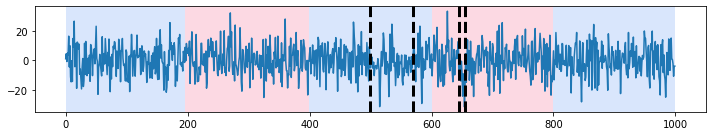

Piecewise 2D Gaussian data: --------------------------------------
Result for KCP cosine:  [5, 380, 390, 400, 500]


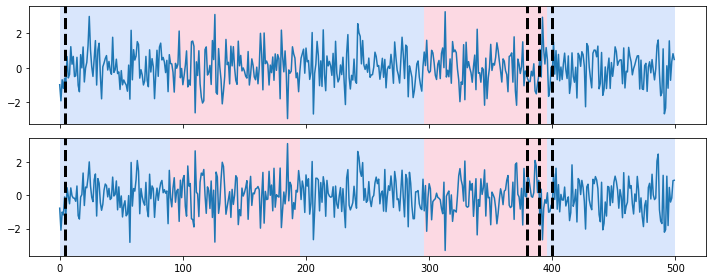

Piecewise sinusoidal data: --------------------------------------
Result for KCP cosine:  [35, 70, 435, 490, 500]


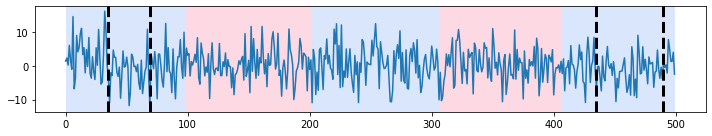

In [113]:
#cosine
#constant data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_c)
result_c = algo_cosine.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for KCP cosine: ", result_c)

rpt.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_l)
result_l = algo_cosine.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for KCP cosine: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_n)
result_n = algo_cosine.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for KCP cosine: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_cosine = rpt.Dynp(model="cosine").fit(signal_w)
result_w = algo_cosine.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for KCP cosine: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

## Linearly penalized segmentation

3 kinds: linear (l1), piecewise constant (l2), rbf


#### pw_constant data:
- l1, rbf most accurate
- l2 not accurate, generated too many points values

Piecewise constant data: --------------------------------------
Result for pelt l1:  [60, 65, 70, 115, 150, 165, 170, 210, 215, 220, 225, 245, 275, 280, 445, 460, 490, 505, 515, 525, 550, 585, 590, 610, 620, 625, 635, 645, 650, 665, 685, 705, 710, 730, 750, 755, 765, 785, 800, 810, 825, 835, 845, 850, 880, 885, 900, 960, 995, 1000]


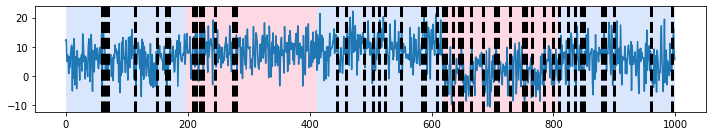

Piecewise linear data: --------------------------------------
Result for pelt l1:  [5, 10, 25, 30, 45, 50, 65, 70, 75, 95, 100, 105, 130, 145, 150, 155, 160, 165, 170, 180, 185, 190, 195, 210, 215, 220, 230, 240, 255, 265, 275, 285, 300, 305, 310, 325, 335, 360, 370, 375, 390, 395, 410, 420, 430, 440, 445, 460, 465, 470, 475, 480, 485, 500, 520, 525, 535, 540, 550, 565, 605, 610, 620, 625, 630, 640, 645, 655, 675, 690, 695, 720, 725, 735, 740, 760, 765, 775, 780, 785, 790, 795, 800, 810, 825, 830, 835, 840, 845, 850, 855, 860, 870, 875, 890, 900, 905, 910, 920, 925, 930, 935, 940, 950, 970, 975, 980, 985, 990, 995, 1000]


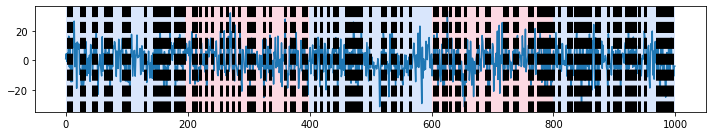

Piecewise 2D Gaussian data: --------------------------------------
Result for pelt l1:  [5, 380, 390, 500]


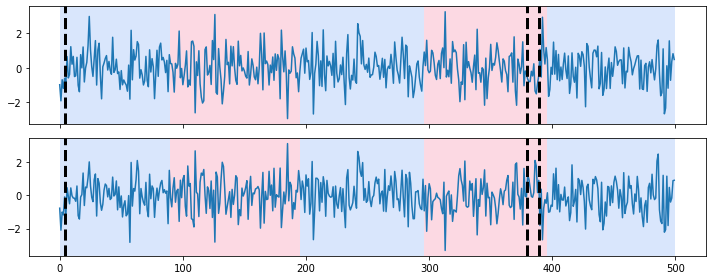

Piecewise sinusoidal data: --------------------------------------
Result for pelt l1:  [10, 20, 25, 35, 40, 60, 65, 85, 90, 115, 150, 175, 190, 205, 220, 225, 230, 250, 260, 265, 270, 275, 280, 305, 310, 320, 325, 330, 340, 365, 370, 375, 380, 400, 450, 470, 490, 500]


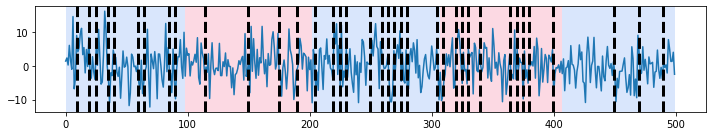

In [114]:
model = "l1" 
#constant 
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_c)
result_c = algo_l1.predict(pen=4)
print("Piecewise constant data: --------------------------------------")
print("Result for pelt l1: ", result_c)

# show results
rpt.display(signal_c, bkps_c, result_c)
plt.show()


#linear
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_l)
result_l = algo_l1.predict(pen=4)
print("Piecewise linear data: --------------------------------------")
print("Result for pelt l1: ", result_l)

rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_n)
result_n = algo_l1.predict(pen=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for pelt l1: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_l1 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_w)
result_w = algo_l1.predict(pen=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for pelt l1: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for pelt l2:  [5, 15, 20, 25, 30, 35, 40, 45, 55, 65, 70, 75, 80, 85, 90, 105, 110, 115, 120, 125, 130, 140, 145, 150, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 245, 255, 260, 270, 275, 280, 285, 295, 300, 310, 315, 320, 325, 335, 340, 350, 355, 365, 380, 385, 390, 395, 400, 405, 420, 425, 430, 435, 445, 450, 455, 460, 470, 475, 485, 490, 495, 500, 510, 515, 525, 540, 545, 550, 560, 565, 585, 590, 600, 610, 620, 625, 630, 640, 645, 650, 655, 665, 670, 675, 685, 690, 700, 705, 710, 720, 725, 730, 735, 745, 750, 755, 765, 770, 780, 785, 795, 800, 810, 820, 825, 830, 835, 840, 845, 850, 865, 870, 875, 880, 885, 890, 900, 905, 935, 950, 960, 965, 975, 980, 995, 1000]


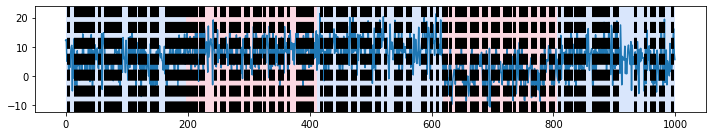

Piecewise linear data: --------------------------------------
Result for pelt l2:  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 95, 100, 105, 110, 115, 120, 125, 130, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 235, 240, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 350, 355, 365, 370, 380, 385, 390, 395, 400, 410, 420, 440, 445, 460, 465, 470, 475, 480, 490, 495, 505, 515, 520, 525, 530, 535, 540, 550, 555, 565, 570, 585, 590, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 705, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 795, 800, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000]


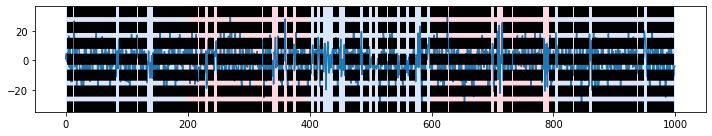

Piecewise 2D Gaussian data: --------------------------------------
Result for pelt l2:  [5, 50, 60, 65, 130, 135, 240, 245, 285, 295, 325, 330, 370, 390, 395, 490, 495, 500]


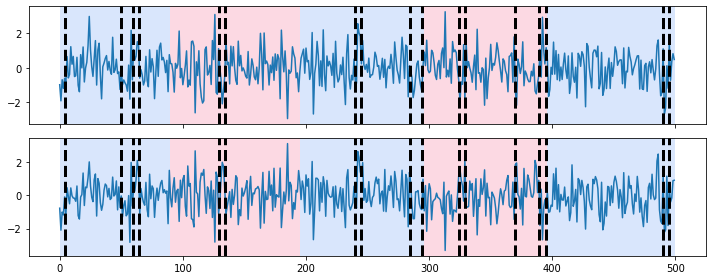

Piecewise sinusoidal data: --------------------------------------
Result for pelt l2:  [10, 15, 20, 25, 30, 35, 40, 45, 55, 60, 65, 70, 75, 80, 85, 90, 115, 120, 135, 140, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 210, 215, 220, 225, 230, 235, 240, 250, 255, 260, 265, 270, 275, 285, 290, 295, 300, 305, 310, 320, 325, 330, 335, 345, 350, 355, 370, 375, 380, 385, 390, 400, 410, 415, 420, 425, 435, 440, 450, 455, 460, 465, 470, 480, 490, 500]


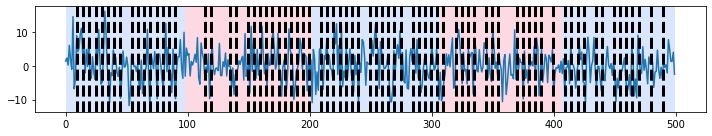

In [115]:
model = "l2"
#constant 
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_c)
result_c = algo_l2.predict(pen=4)
print("Piecewise constant data: --------------------------------------")
print("Result for pelt l2: ", result_c)

# show results
fig, (ax,) = rpt.display(signal_c, bkps_c, result_c)
plt.show()


#linear
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_l)
result_l = algo_l2.predict(pen=4)
print("Piecewise linear data: --------------------------------------")
print("Result for pelt l2: ", result_l)

# show results
fig, (ax,) = rpt.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_n)
result_n = algo_l2.predict(pen=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for pelt l2: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_l2 = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_w)
result_w = algo_l2.predict(pen=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for pelt l2: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()


Piecewise constant data: --------------------------------------
Result for pelt rbf:  [180, 620, 810, 1000]


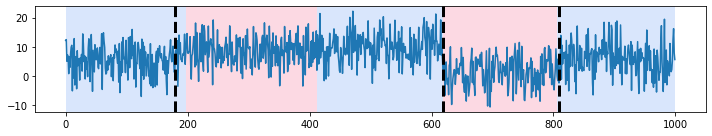

Piecewise linear data: --------------------------------------
Result for pelt rbf:  [1000]


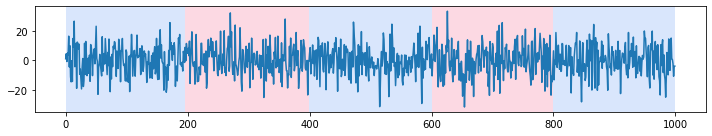

Piecewise 2D Gaussian data: --------------------------------------
Result for pelt rbf:  [90, 195, 295, 395, 500]


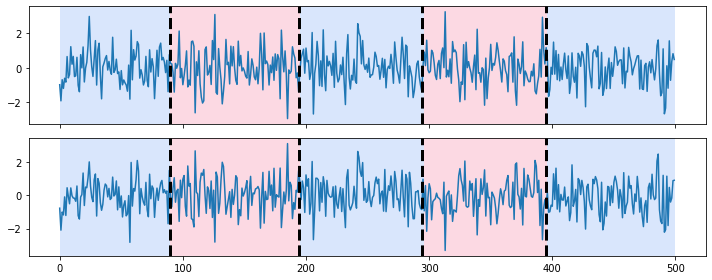

Piecewise sinusoidal data: --------------------------------------
Result for pelt rbf:  [500]


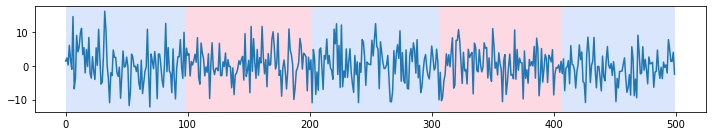

In [116]:
model = "rbf"
#constant 
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_c)
result_c = algo_rbf.predict(pen=4)
print("Piecewise constant data: --------------------------------------")
print("Result for pelt rbf: ", result_c)

# show results
fig, (ax,) = rpt.display(signal_c, bkps_c, result_c)
plt.show()


#linear
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_l)
result_l = algo_rbf.predict(pen=4)
print("Piecewise linear data: --------------------------------------")
print("Result for pelt rbf: ", result_l)

# show results
fig, (ax,) = rpt.display(signal_l, bkps_l, result_l)
plt.show()


#normal data
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_n)
result_n = algo_rbf.predict(pen=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for pelt rbf: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data 
algo_rbf = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal_w)
result_w = algo_rbf.predict(pen=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for pelt rbf: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()


## Window-based change point detection

several types: l1, l2, rbf, linear, normal, ar

[204, 413, 608, 796, 1000] 

#### pw_constant data:
- l2, rbf, and normal  most accurate
- ar and l1 slightly accurate 
- l2 not accurate, changepoint values were all small and hardly guessed the right points



Piecewise constant data: --------------------------------------
Result for window l1:  [620, 670, 815, 960, 1000]


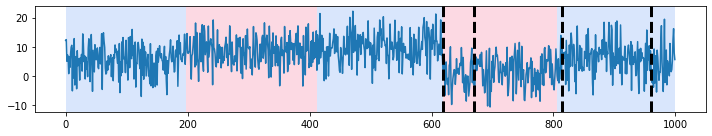

Piecewise linear data: --------------------------------------
Result for window l1:  [230, 645, 855, 970, 1000]


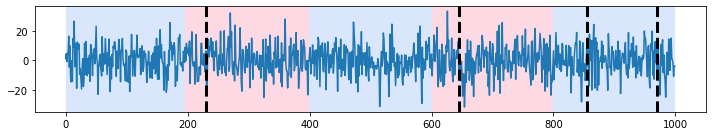

Piecewise 2D Gaussian data: --------------------------------------
Result for window l1:  [20, 220, 370, 420, 500]


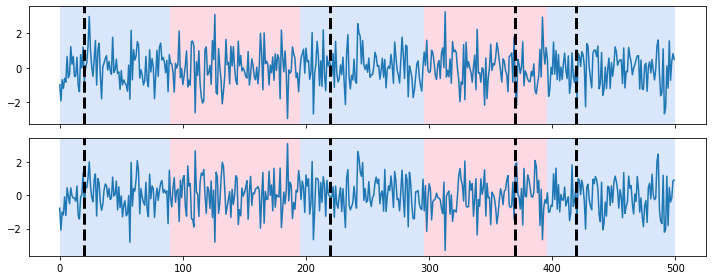

Piecewise sinusoidal data: --------------------------------------
Result for window l1:  [30, 195, 290, 320, 500]


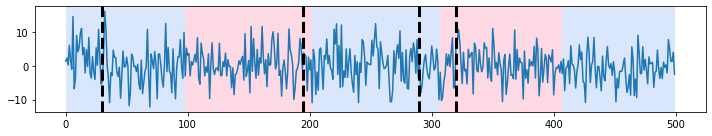

In [117]:
model = "l1"  
#constant data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_l1.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window l1: ", result_c)

rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_l1.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window l1: ", result_l)

rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_l1.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window l1: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_l1 = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_l1.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window l1: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window l2:  [185, 620, 785, 815, 1000]


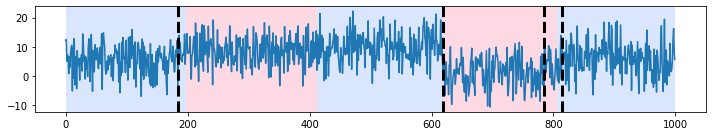

Piecewise linear data: --------------------------------------
Result for window l2:  [170, 235, 645, 670, 1000]


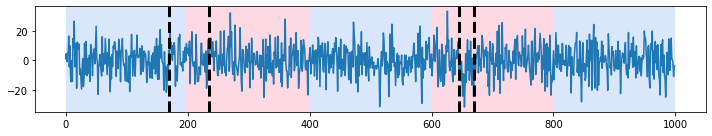

Piecewise 2D Gaussian data: --------------------------------------
Result for window l2:  [20, 240, 325, 390, 500]


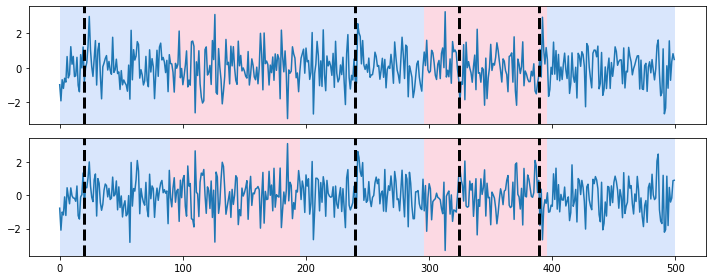

Piecewise sinusoidal data: --------------------------------------
Result for window l2:  [35, 175, 265, 320, 500]


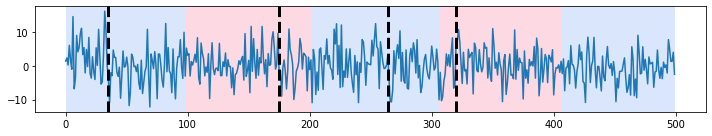

In [118]:
model = "l2" 
algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_l2.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window l2: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_l2.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window l2: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_l2.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window l2: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_l2 = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_l2.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window l2: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window rbf:  [210, 620, 785, 815, 1000]


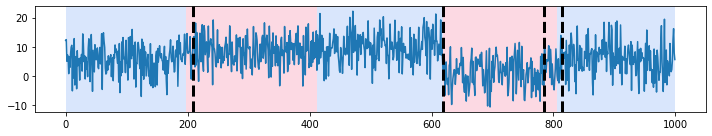

Piecewise linear data: --------------------------------------
Result for window rbf:  [230, 500, 875, 950, 1000]


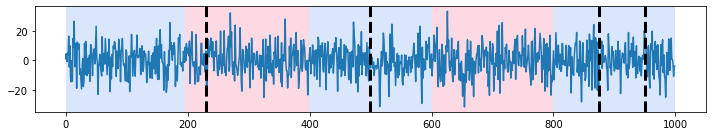

Piecewise 2D Gaussian data: --------------------------------------
Result for window rbf:  [100, 195, 295, 395, 500]


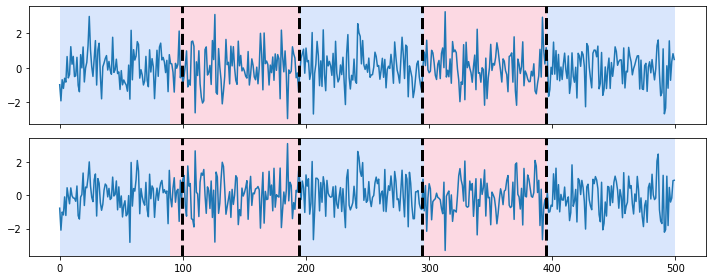

Piecewise sinusoidal data: --------------------------------------
Result for window rbf:  [215, 265, 400, 470, 500]


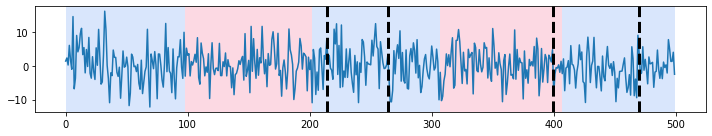

In [119]:
model = "rbf"  
#constant data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_rbf.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window rbf: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_rbf.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window rbf: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_rbf.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window rbf: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_rbf = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_rbf.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window rbf: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window linear:  [185, 540, 855, 970, 1000]


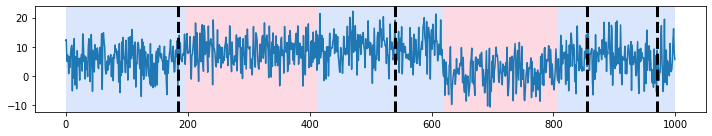

Piecewise linear data: --------------------------------------
Result for window linear:  [270, 555, 635, 780, 1000]


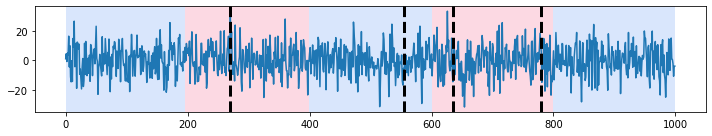

Piecewise 2D Gaussian data: --------------------------------------
Result for window linear:  [90, 195, 295, 395, 500]


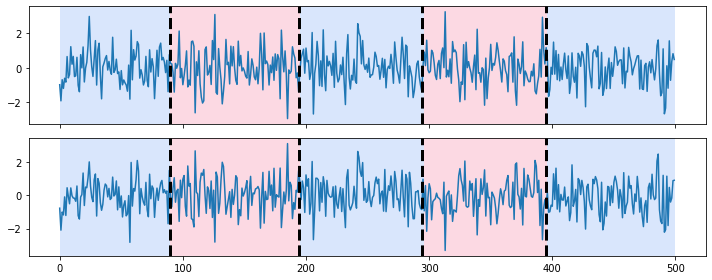

In [120]:
model = "linear"  # "l1", "rbf", "linear", "normal", "ar"
#constant data
algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_linear.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window linear: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_linear.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window linear: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()


#normal data
algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_linear.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window linear: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
# algo_linear = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
# result_w = algo_linear.predict(n_bkps=4)
# print("Piecewise sinusoidal data: --------------------------------------")
# print("Result for window linear: ", result_w)

# rpt.display(signal_w, bkps_w, result_w)
# plt.show()

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


Piecewise constant data: --------------------------------------
Result for window normal:  [185, 585, 620, 785, 1000]


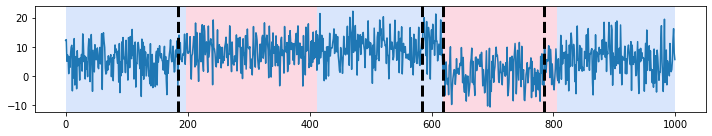

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


Piecewise linear data: --------------------------------------
Result for window normal:  [515, 540, 570, 670, 1000]


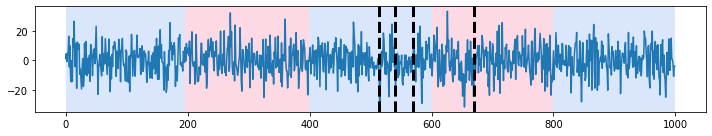

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


Piecewise 2D Gaussian data: --------------------------------------
Result for window normal:  [90, 195, 295, 395, 500]


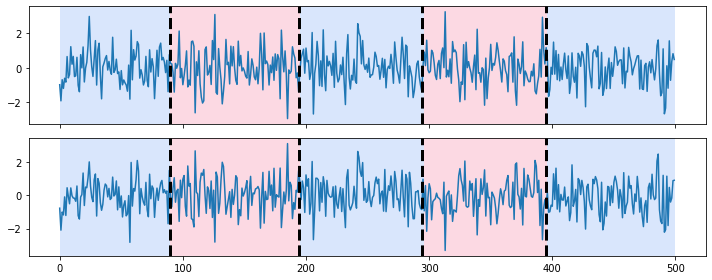

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


Piecewise sinusoidal data: --------------------------------------
Result for window normal:  [35, 145, 265, 470, 500]


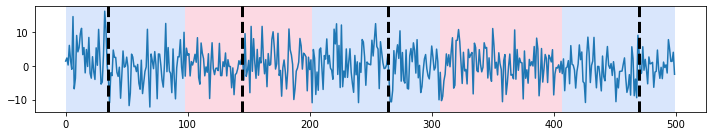

In [121]:
model = "normal"  # "l1", "rbf", "linear", "normal", "ar"
#constant data
algo_norm = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_norm.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window normal: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_norm = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_norm.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window normal: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_norm= rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_norm.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window normal: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_norm = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_norm.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window normal: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()

Piecewise constant data: --------------------------------------
Result for window ar:  [585, 610, 750, 970, 1000]


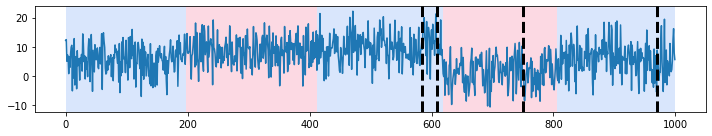

Piecewise linear data: --------------------------------------
Result for window ar:  [500, 640, 700, 855, 1000]


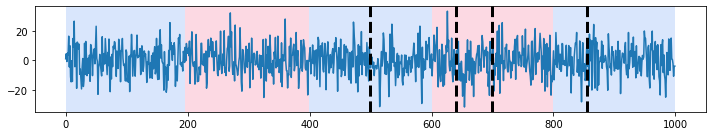

Piecewise 2D Gaussian data: --------------------------------------
Result for window ar:  [40, 135, 165, 370, 500]


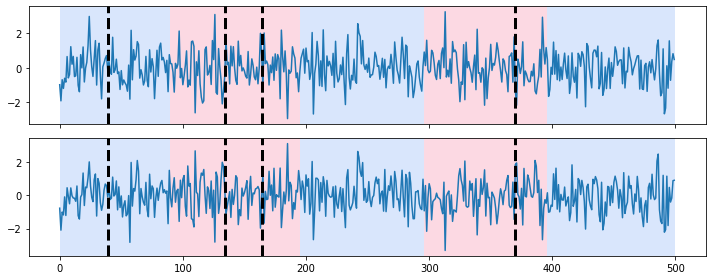

Piecewise sinusoidal data: --------------------------------------
Result for window ar:  [45, 170, 325, 450, 500]


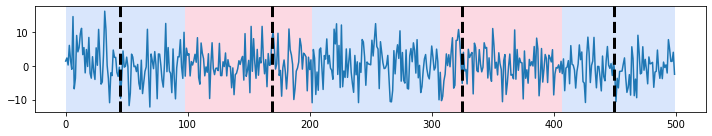

In [122]:
model = "ar"
#constant data 
algo_ar = rpt.Window(width=40, model=model, jump=5).fit(signal_c)
result_c = algo_ar.predict(n_bkps=4)
print("Piecewise constant data: --------------------------------------")
print("Result for window ar: ", result_c)

# show results
rpt.show.display(signal_c, bkps_c, result_c)
plt.show()

#linear data
algo_ar = rpt.Window(width=40, model=model, jump=5).fit(signal_l)
result_l = algo_ar.predict(n_bkps=4)
print("Piecewise linear data: --------------------------------------")
print("Result for window ar: ", result_l)

# show results
rpt.show.display(signal_l, bkps_l, result_l)
plt.show()

#normal data
algo_ar= rpt.Window(width=40, model=model, jump=5).fit(signal_n)
result_n = algo_ar.predict(n_bkps=4)
print("Piecewise 2D Gaussian data: --------------------------------------")
print("Result for window ar: ", result_n)

rpt.display(signal_n, bkps_n, result_n)
plt.show()

#wavy data
algo_ar = rpt.Window(width=40, model=model, jump=5).fit(signal_w)
result_w = algo_ar.predict(n_bkps=4)
print("Piecewise sinusoidal data: --------------------------------------")
print("Result for window ar: ", result_w)

rpt.display(signal_w, bkps_w, result_w)
plt.show()